--------------------------------------------------------------------------------------------------
# **Stroke Occurrence Prediction**
--------------------------------------------------------------------------------------------------

--------------------
## **Context**
--------------------

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Stroke Prediction Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

----------------------
## **Objective**
----------------------

Build a classification model using neural networks to predict the probability of positive stroke

------------------------------
## **Data Dictionary**
------------------------------

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
The features included are: 

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## **Loading the libraries and the dataset**

In [1]:
from google.colab import files

uploaded = files.upload()

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation

from tensorflow.keras.metrics import AUC

from tensorflow.keras.optimizers import experimental

In [4]:
# Importing the dataset
data = pd.read_csv('/content/train.csv')

# Check the top five records of the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


- In the above dataset, the target variable is **stroke**.

In [5]:
# Dropping columns
data = data.drop(['id'], axis = 1)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


## **Exploratory Data Analysis**

In [ ]:
# Let's check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


**Observations:**

- There are **15304 observations and 11 columns** in the data.
- 6 of the columns are of **numeric data** type and 5 are non-numeric
- There are **no missing values** in the data.

### **Summary Statistics**

In [ ]:
# Let's check the summary statistics of the data
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,15304.0,41.417708,21.444673,0.08,26.0,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.0,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.0,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.5,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.0,0.00,0.00,1.0


**Observations:**

- The average age of patients ~ 41. Patients ranged in age from 0 to 82. 
- The average BMI score of patients is 28.1 which is overweight. The median is 27.6 which means that a majority of patients were overweight or obese.
- There are patients with a wide range of glucose levels - ranging from 55 to 267.
- 5% of patients have hypertension, 5% have heart disease and 4% have had a stroke

### **Let's visualize the dataset to see some patterns**

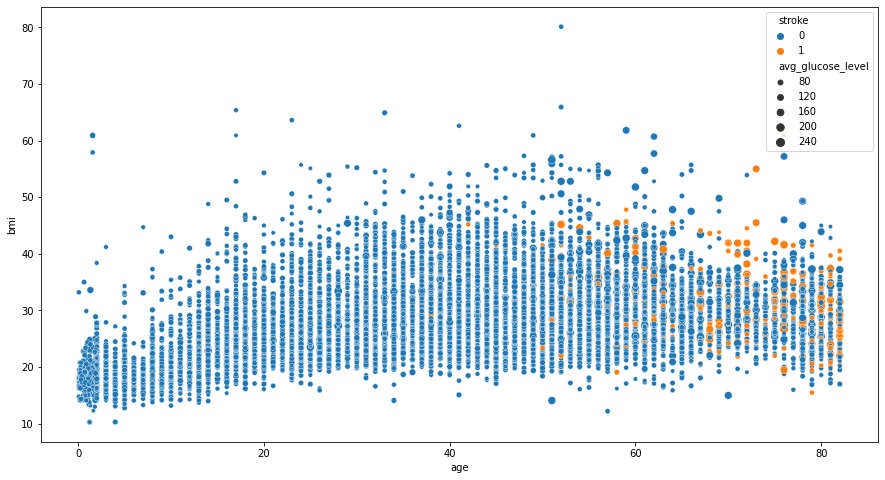

In [6]:
plt.figure(figsize = (15, 8))

sns.scatterplot(data = data,
                 
           x = 'age',

           y = 'bmi',

           hue = 'stroke',

           size = 'avg_glucose_level'
)

**Observations:** 

- There is no obvious relationship between age and BMI.
- Glucose levels increase with age and weight. 
- We can see a distinction between patients who suffered a stroke (denoted by orange) vs those who did not (denoted by blue). We can see that the majority of stroke patients were older than 60, BMI greater than 25, and average glucose of 160 or higher.

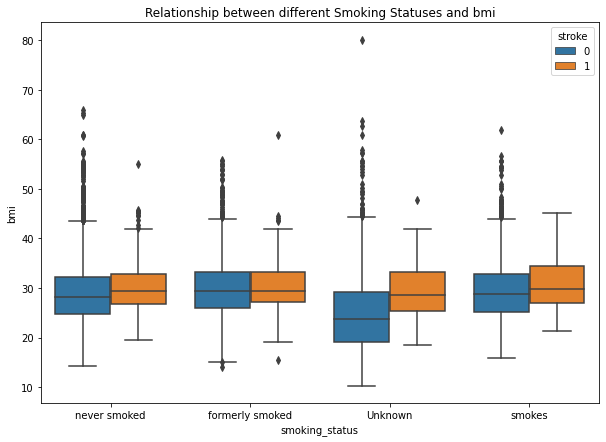

In [ ]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = data,
            
             x = 'smoking_status', 
            
             y = 'bmi',
            
             hue = 'stroke')

plt.title('Relationship between different Smoking Statuses and bmi')

plt.show()

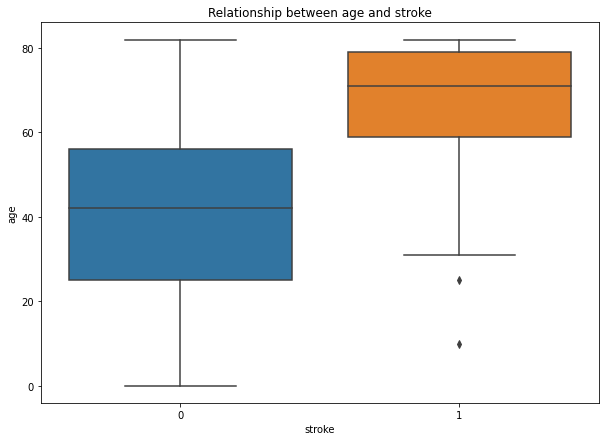

In [ ]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = data,
            
             x = 'stroke', 
            
             y = 'age')

plt.title('Relationship between age and stroke')

plt.show()

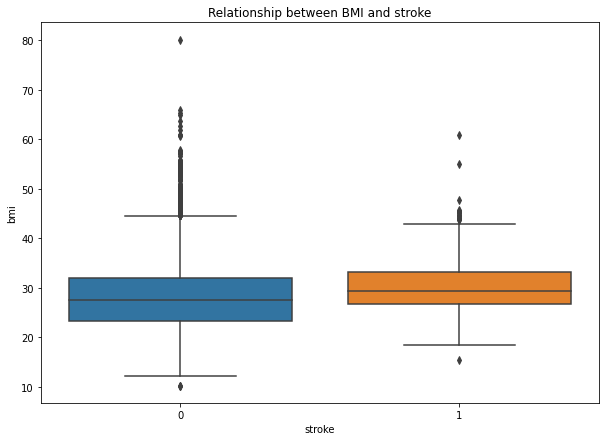

In [ ]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = data,
            
             x = 'stroke', 
            
             y = 'bmi')

plt.title('Relationship between BMI and stroke')

plt.show()

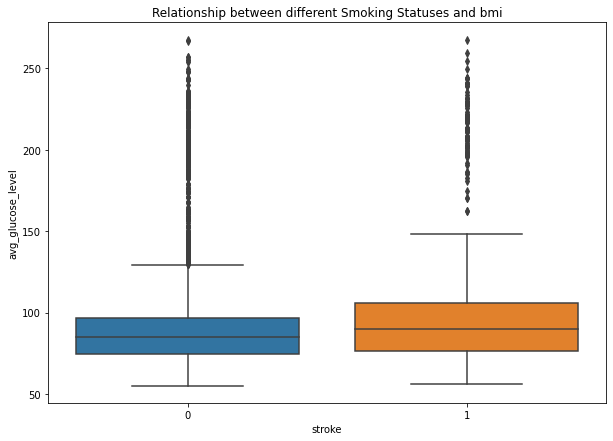

In [ ]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = data,
            
             x = 'stroke', 
            
             y = 'avg_glucose_level')

plt.title('Relationship between different stroke and glucose')

plt.show()

age
Skew : -0.11


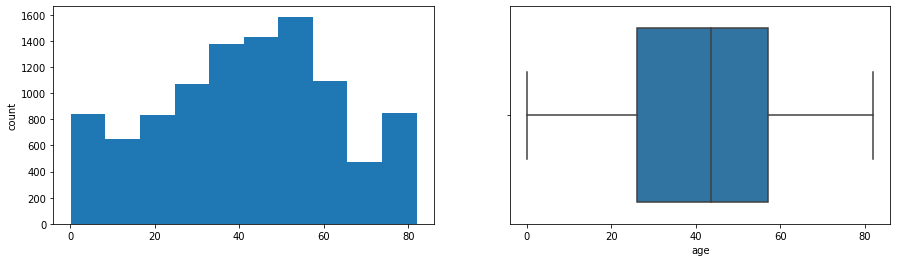

avg_glucose_level
Skew : 3.07


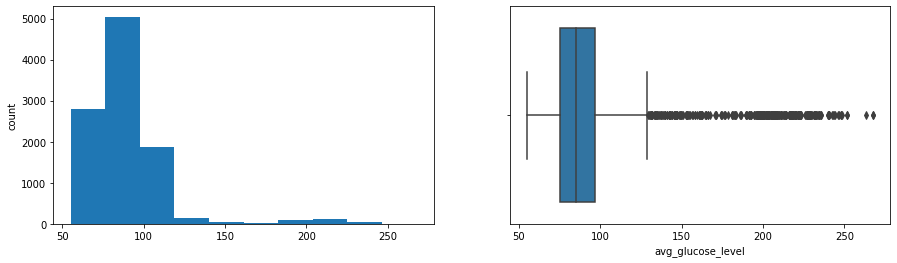

bmi
Skew : 0.86


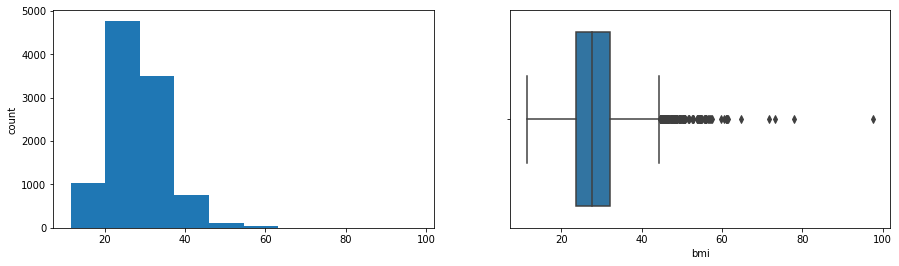

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:** 

- We can see that stroke patients are more likely to have smoked than non-stroke patients, tend to be older, and tend to be heavier.

- We can also see there are quite a few outliers.

## **Data Preparation**

This dataset contains both numerical and categorical variables. We need to treat them before we pass them onto the neural network. We will perform the below pre-processing steps: 
*   One hot encoding of categorical variables
*   Scaling numerical variables

Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance. This is known as **data leakage** which we would like to avoid.

In [7]:
one_hot_data = data.copy()


In [8]:
s = (data.dtypes == 'object')

In [9]:
for ch in list(s[s].index):
  one_hot_data = pd.concat([one_hot_data, pd.get_dummies(data[ch], prefix = ch)], axis = 1)

  one_hot_data = one_hot_data.drop(columns = ch)

one_hot_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,79.53,31.1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,33.0,0,0,78.44,23.9,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,42.0,0,0,103.00,40.3,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,56.0,0,0,64.87,28.8,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,0,0,73.36,28.8,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


Now, let's split the dataset into train and test datasets. To do that, we would be extracting all the **independent variables** and saving them into a variable **features**. And the target variable **stroke** would be saved into a variable **target**.

In [10]:
features = one_hot_data.drop(['stroke'], axis = 1)

target = one_hot_data['stroke']

The size of the dataset is small and the Keras implementation provides an argument for selecting some percentage of training data as validation data to check the accuracy of the model. Therefore, we will split the data into an 80:20 ratio.

In [11]:
# Splitting the dataset into the train and the test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size = 0.2, random_state = 42)


Now, we will perform scaling on the numerical variables. We will perform **fit** and **transform** on the train data and then we will only perform **transform** on the test data. 

In [12]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)
y_train.shape
X_train_normalized.shape

(12243, 21)

In [13]:
X_test = scaler.transform(X_test)

## **Model Building**

In neural networks, there are so many hyper-parameters that you can play around with and tune the network to get the best results. Some of them are: 


1.   Number of hidden layers
2.   Number of neurons in each hidden layer
3.   Activation functions in hidden layers
4.   Optimizers
5.   Random initialization of weights and biases
6.   Batch size
7.   Learning rate
8.   Early stopping
9.   L1 and L2 Regularization
10.  Dropout
11.  Momentum

and so on...

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results every time we run the code.

In [14]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(2)

tf.random.set_seed(2)

In [13]:
# #Resample: 
# import imblearn
# from imblearn.over_sampling import SMOTE

# # Create the SMOTE object
# smote = SMOTE()

# # Apply SMOTE to the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# X_train_resampled = X_train_resampled.astype(float)
# y_train_resampled = y_train_resampled.astype(float)

Let's build a feed-forward neural network with 1 input layer, 2 hidden layers and an output layer. We are starting with one hidden layer and I'll increase the number if necessary. This is because adding more layers can lead to overfitting. 

Due to the one-hot-encoding, the sparsity of the data is high: ReLU can lead to sparse representations because it sets all negative values to zero. This can cause problems if the data is sparse, as the model will not be able to learn the underlying patterns in the data. In this case, using an activation function that does not cause sparse representations such as Leaky ReLU or Exponential Linear Unit (ELU) may be more appropriate. 

There are several ways to deal with high-sparsity data when training a neural network:

Using an activation function that does not cause sparse representations such as Leaky ReLU or Exponential Linear Unit (ELU) can help to alleviate the problem. They can be useful alternatives to the traditional Rectified Linear Unit (ReLU) activation function, which can cause sparse representations due to the fact that it sets all negative values to zero. 

Both Leaky ReLU and ELU can help to alleviate this problem by allowing some information to flow through the negative part of the input. ELU is defined as f(x) = max(α(exp(x) - 1), x), where α is a positive parameter (usually set to 1). It allows a non-zero gradient for negative input values, and it also has the advantage of being self-normalizing. This means that it tends to produce outputs with zero mean and unit variance, which can help to improve the stability of the training process. 

Although ELU is slightly more computationally expensive than Leaky ReLU. Both Leaky ReLU and ELU can be useful alternatives when dealing with high-sparsity data like this one-hot-encoded data, but ELU has the advantage of being self-normalizing, which can help to improve the stability of the training process so we will be going with ELU.

Using weight decay or L1 regularization in the loss function can also help to reduce the number of zero or small weights and encourage the model to assign non-zero weights to more input features. I'll come back to this

Using dropout can help to randomly drop out some units during training, which can help to prevent overfitting and encourage the model to assign non-zero weights to more input features. I'll also come back to this



In [15]:
from tensorflow.keras.layers import Dense
# We will be adding the layers sequentially
model_1 = Sequential()

# Input layer with 32 neurons and elu activation function, the input_shape tuple denotes number of independent variables
model_1.add(Dense(32, activation = 'elu', input_shape = (21, )))

# Hidden layer with 32 neurons and elu activation function
model_1.add(Dense(32, activation = 'elu'))

# Hidden layer with 32 neurons and elu activation function
model_1.add(Dense(32, activation = 'elu'))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of a patient having a stroke  
model_1.add(Dense(1, activation = 'sigmoid'))

Now that we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

For binary classification on sparse, imbalanced data with a lot of outliers, it's important to choose a loss function that can handle the class imbalance, sparsity of data and also can handle the outliers. We will use BinaryFocalCrossentropy loss: a variant of the Binary Cross-Entropy loss that incorporates the focal loss concept. It is a combination of binary cross-entropy loss and focal loss which is designed for imbalanced datasets. It modifies the standard cross-entropy loss by down-weighting easy examples and up-weighting hard examples, which makes it less sensitive to outliers and more robust to imbalanced data.

For binary classification on sparse, imbalanced data with a lot of outliers, it's important to choose an optimizer that can handle the class imbalance and also can handle the sparsity of data and outliers. Some commonly used optimizers for this type of data are:
- AdamW: AdamW is a variant of Adam optimizer that adds weight decay, which improves the generalization performance of the model. It's robust to outliers, and it can handle sparse and imbalanced data.
- RAdam: RAdam is another variant of Adam optimizer which uses a rectified version of the update rule, this helps to reduce the variance of the update and improve generalization performance. It's also robust to outliers, and can also handle sparse and imbalanced data.

For now, let's try the **RAdam** optimizer.

In [ ]:
!pip install tf-nightly

In [ ]:
!pip install tensorflow-addons

In [18]:
import tensorflow_addons as tfa 
from tensorflow_addons.optimizers import RectifiedAdam

optimizer = tfa.optimizers.RectifiedAdam(lr=1e-3)
model_1.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(), 
                optimizer = optimizer, 
                metrics = ['AUC'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


From the above summary, we can see that this architecture will train a total of **3,521** parameters, i.e., weights and biases in the network.

### **Training the model**

Let's now train the model using the below piece of code. We will keep 10% of the training data for validation.

In [71]:
from tensorflow.keras import backend
backend.clear_session()

In [20]:
# X_train_normalized = X_train_normalized.astype(float) 

# y_train = y_train.astype(float)



from sklearn.utils.class_weight import compute_sample_weight

# tf.config.run_functions_eagerly(True)

class_weights = {0: 1.,
                1: 19.}

#sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)

history_1 = model_1.fit(X_train_normalized, y_train, 
                        
                    class_weight=class_weights,

                    batch_size = 64,

                    validation_split = 0.1, 

                    epochs = 100, 

                    verbose = 2,

                    callbacks=[early_stopping],
                    
                    use_multiprocessing = True)

Epoch 1/100
173/173 - 5s - loss: 0.2823 - auc: 0.6693 - val_loss: 0.1307 - val_auc: 0.8248 - 5s/epoch - 32ms/step
Epoch 2/100
173/173 - 1s - loss: 0.2471 - auc: 0.7801 - val_loss: 0.1084 - val_auc: 0.8536 - 820ms/epoch - 5ms/step
Epoch 3/100
173/173 - 1s - loss: 0.2289 - auc: 0.8292 - val_loss: 0.1095 - val_auc: 0.8874 - 753ms/epoch - 4ms/step
Epoch 4/100
173/173 - 1s - loss: 0.2159 - auc: 0.8497 - val_loss: 0.0935 - val_auc: 0.8736 - 777ms/epoch - 4ms/step
Epoch 5/100
173/173 - 1s - loss: 0.2077 - auc: 0.8635 - val_loss: 0.0967 - val_auc: 0.8895 - 774ms/epoch - 4ms/step
Epoch 6/100
173/173 - 1s - loss: 0.2034 - auc: 0.8693 - val_loss: 0.1034 - val_auc: 0.8906 - 777ms/epoch - 4ms/step
Epoch 7/100
173/173 - 1s - loss: 0.2006 - auc: 0.8727 - val_loss: 0.0808 - val_auc: 0.8945 - 789ms/epoch - 5ms/step
Epoch 8/100
173/173 - 1s - loss: 0.2017 - auc: 0.8703 - val_loss: 0.0953 - val_auc: 0.8942 - 756ms/epoch - 4ms/step
Epoch 9/100
173/173 - 1s - loss: 0.1982 - auc: 0.8757 - val_loss: 0.0910 -

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### **Plotting Accuracy vs Epoch Curve**

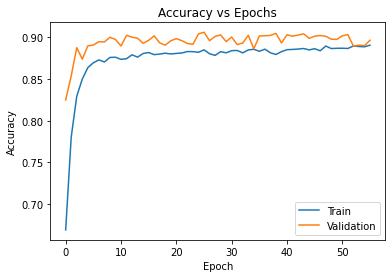

In [21]:
plt.plot(history_1.history['auc'])

plt.plot(history_1.history['val_auc'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

In [22]:
test_pred = model_1.predict(X_test)

test_pred = (np.rint(test_pred)).astype(int)

96/96 [==============================] - 0s 1ms/step


In [76]:
test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2931
           1       0.15      0.76      0.25       130

    accuracy                           0.81      3061
   macro avg       0.57      0.78      0.57      3061
weighted avg       0.95      0.81      0.86      3061



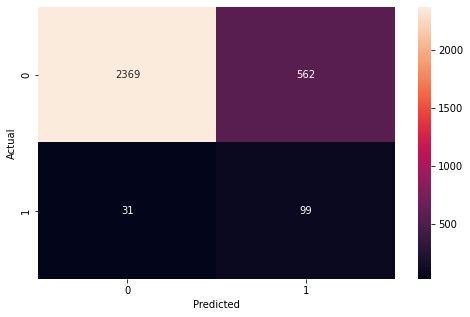

In [23]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)    #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, test_pred)

0.7848975146313938

**Observations:**

- The ROC score is 0.78. Lets see if we can get that up.

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [25]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [26]:
# Fixing the seed for random number generators
np.random.seed(10)

import random

random.seed(25)

tf.random.set_seed(105)

In [96]:
del model_2

In [28]:
# We will be adding the layers sequentially
model_2 = Sequential()

# Input layer with 64 neurons and elu activation function, the input_shape tuple denotes number of independent variables
model_2.add(Dense(64, activation = 'elu', input_shape = (21, )))

model_2.add(Dropout(0.1))

# Hidden layer with 32 neurons and elu activation function
model_2.add(Dense(32, activation = 'elu'))
model_2.add(Dropout(0.1))

# Hidden layer with 32 neurons and elu activation function
model_2.add(Dense(32, activation = 'elu'))
model_2.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of a patient having a stroke  
model_2.add(Dense(1, activation = 'sigmoid'))

In [29]:
model_2.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(), 
                optimizer = optimizer, 
                metrics = ['AUC'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1408      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [30]:
plat = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)



history_2 = model_2.fit(X_train_normalized, y_train, 
                        
                    class_weight=class_weights,

                    batch_size = 64,

                    validation_split = 0.1, 

                    epochs = 100, 

                    verbose = 2,

                    callbacks=[early_stopping, plat],
                    
                    use_multiprocessing = True)

Epoch 1/100
173/173 - 2s - loss: 0.2632 - auc: 0.7668 - val_loss: 0.0852 - val_auc: 0.8922 - lr: 0.0010 - 2s/epoch - 14ms/step
Epoch 2/100
173/173 - 1s - loss: 0.2119 - auc: 0.8529 - val_loss: 0.1004 - val_auc: 0.9019 - lr: 0.0010 - 842ms/epoch - 5ms/step
Epoch 3/100
173/173 - 1s - loss: 0.2062 - auc: 0.8633 - val_loss: 0.1061 - val_auc: 0.8932 - lr: 0.0010 - 823ms/epoch - 5ms/step
Epoch 4/100
173/173 - 1s - loss: 0.2038 - auc: 0.8671 - val_loss: 0.1332 - val_auc: 0.8963 - lr: 0.0010 - 787ms/epoch - 5ms/step
Epoch 5/100
173/173 - 1s - loss: 0.2066 - auc: 0.8626 - val_loss: 0.1191 - val_auc: 0.9058 - lr: 0.0010 - 787ms/epoch - 5ms/step
Epoch 6/100
173/173 - 1s - loss: 0.2016 - auc: 0.8676 - val_loss: 0.1053 - val_auc: 0.8943 - lr: 0.0010 - 797ms/epoch - 5ms/step
Epoch 7/100
173/173 - 1s - loss: 0.1986 - auc: 0.8758 - val_loss: 0.0711 - val_auc: 0.8905 - lr: 0.0010 - 807ms/epoch - 5ms/step
Epoch 8/100
173/173 - 1s - loss: 0.2006 - auc: 0.8718 - val_loss: 0.1244 - val_auc: 0.8858 - lr: 0.

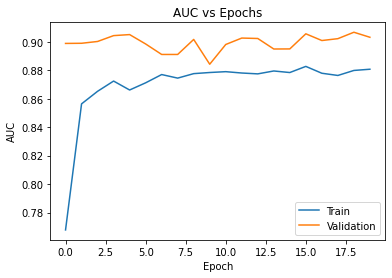

In [101]:
plt.plot(history_2.history['auc'])

plt.plot(history_2.history['val_auc'])

plt.title('AUC vs Epochs')

plt.ylabel('AUC')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

In [32]:
test_pred = model_2.predict(X_test)

test_pred = (np.rint(test_pred)).astype(int)

roc_auc_score(y_test, test_pred)

96/96 [==============================] - 0s 1ms/step


0.7916450148282288

**Observations:** 

- The test AUC has increased to 79%.
- The validation accuracy is higher than the training accuracy. This might be due to the small size of the validation set and the model can correctly classify the data points in the validation set.

Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.

We will use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [93]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [92]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)
del model_3

In [95]:

# We will be adding the layers sequentially
model_3 = Sequential()

# Input layer with 64 neurons and elu activation function, the input_shape tuple denotes number of independent variables
model_3.add(Dense(64, activation = 'elu', input_shape = (21, )))

model_3.add(Dropout(0.15))

# Hidden layer with 32 neurons and elu activation function
model_3.add(Dense(64, activation = 'elu'))
model_3.add(Dropout(0.15))

# Hidden layer with 32 neurons and elu activation function
model_3.add(Dense(32, activation = 'elu'))
model_3.add(Dropout(0.15))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of a patient having a stroke  
model_3.add(Dense(1, activation = 'sigmoid'))

In [96]:
optimizer = tfa.optimizers.RectifiedAdam(lr=0.01)
model_3.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(), optimizer = optimizer, metrics = ['AUC'])

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1408      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

- Notice that the number of trainable parameters has increased substantially in comparison to previous models.

In [97]:
plat = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.5, 
        min_lr=1e-8, 
        min_delta=0.01)

early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)


history_3 = model_3.fit(X_train_normalized, y_train, 
                        
                    class_weight=class_weights,

                    batch_size = 64,

                    validation_split = 0.15, 

                    epochs = 100, 

                    verbose = 2,

                    callbacks=[early_stopping, plat],
                    
                    use_multiprocessing = True)

Epoch 1/100
163/163 - 2s - loss: 0.2645 - auc: 0.7465 - val_loss: 0.1343 - val_auc: 0.8372 - lr: 0.0100 - 2s/epoch - 14ms/step
Epoch 2/100
163/163 - 1s - loss: 0.2325 - auc: 0.8227 - val_loss: 0.1687 - val_auc: 0.8687 - lr: 0.0100 - 865ms/epoch - 5ms/step
Epoch 3/100
163/163 - 1s - loss: 0.2249 - auc: 0.8351 - val_loss: 0.0879 - val_auc: 0.8737 - lr: 0.0100 - 865ms/epoch - 5ms/step
Epoch 4/100
163/163 - 1s - loss: 0.2121 - auc: 0.8498 - val_loss: 0.0804 - val_auc: 0.8842 - lr: 0.0100 - 851ms/epoch - 5ms/step
Epoch 5/100
163/163 - 1s - loss: 0.2183 - auc: 0.8449 - val_loss: 0.1326 - val_auc: 0.8710 - lr: 0.0100 - 799ms/epoch - 5ms/step
Epoch 6/100
163/163 - 1s - loss: 0.2143 - auc: 0.8489 - val_loss: 0.0836 - val_auc: 0.8809 - lr: 0.0100 - 769ms/epoch - 5ms/step
Epoch 7/100
163/163 - 1s - loss: 0.2109 - auc: 0.8561 - val_loss: 0.0815 - val_auc: 0.8805 - lr: 0.0100 - 802ms/epoch - 5ms/step
Epoch 8/100
163/163 - 1s - loss: 0.2004 - auc: 0.8680 - val_loss: 0.0922 - val_auc: 0.8834 - lr: 0.

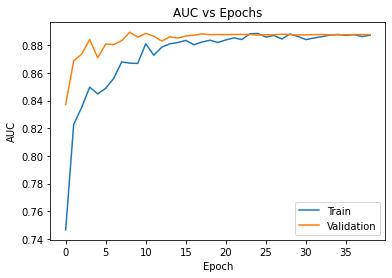

In [98]:
plt.plot(history_3.history['auc'])

plt.plot(history_3.history['val_auc'])

plt.title('AUC vs Epochs')

plt.ylabel('AUC')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc  = 'lower right')

plt.show()

In [102]:
test_pred = model_3.predict(X_test)

test_pred = (np.rint(test_pred)).astype(int)

roc_auc_score(y_test, test_pred)

96/96 [==============================] - 0s 2ms/step


0.8066871374957353

- This model is giving a generalized performance with 89% AUC on the train as well as validation data.
- One reason for the algorithm not being able to reach higher than 89% even for training data might be due to the optimizer being stuck at some local minima.
- The test data do show that the model is overfitting.

For the sake of time, I'll leave it at this. Time to make a submission!

In [118]:
test = pd.read_csv('/content/test.csv')

In [119]:
ids = test['id']

In [111]:
test = test.drop(['id'], axis = 1)

In [112]:
one_hot_test = test.copy()
s = (test.dtypes == 'object')
for ch in list(s[s].index):
  one_hot_test = pd.concat([one_hot_test, pd.get_dummies(test[ch], prefix = ch)], axis = 1)
  one_hot_test = one_hot_test.drop(columns = ch)

In [113]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
test_normalized = scaler.fit_transform(one_hot_test)

In [115]:
preds = model_3.predict(test_normalized)

319/319 [==============================] - 0s 1ms/step


In [128]:
preds = pd.DataFrame(preds) 
out = pd.concat([ids, preds], axis=1)

In [133]:
out = out.rename(columns = {0:'stroke'})

In [137]:
submission = out.to_csv('submission.csv')

In [141]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>